In [1]:
!wget -O data.csv https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv

--2021-10-28 06:30:37--  https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5321884 (5.1M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   5.08M  --.-KB/s    in 0.06s   

2021-10-28 06:30:37 (85.8 MB/s) - ‘data.csv’ saved [5321884/5321884]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [31]:
df = pd.read_csv('data.csv', delimiter = ';')
df.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [32]:
df.tail()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI
18612,02/08/2019,CBR 250RR ABS,HITAM,INDIVIDUAL,LAKI-LAKI,14/02/1994,Gresik,Kab. Gresik,Jawa Timur,RUMAH SEWA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,YAMAHA,AT AUTOMATIC,LAIN-LAIN,PASANGAN SUAMI ATAU ISTRI,Membaca,NaN,WNI
18613,29/07/2019,CBR 250RR ABS,MERAH,INDIVIDUAL,LAKI-LAKI,23/06/1998,Benjeng,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 700.001,- S/D RP 1.000.000,-",SLTA/SMU,YES,HONDA,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18614,15/03/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,18/08/1992,Kebomas,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Makan,NaN,WNI
18615,10/04/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,06/07/1986,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, PERDAGANGAN (RETAIL)","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,NO,HONDA,AT AUTOMATIC,KEBUTUHAN KELUARGA,SAYA SENDIRI,Menanam Bunga,NaN,WNI


In [33]:
df = df.rename({'TYPE MOTOR':'TYPE_MOTOR'}, axis=1)

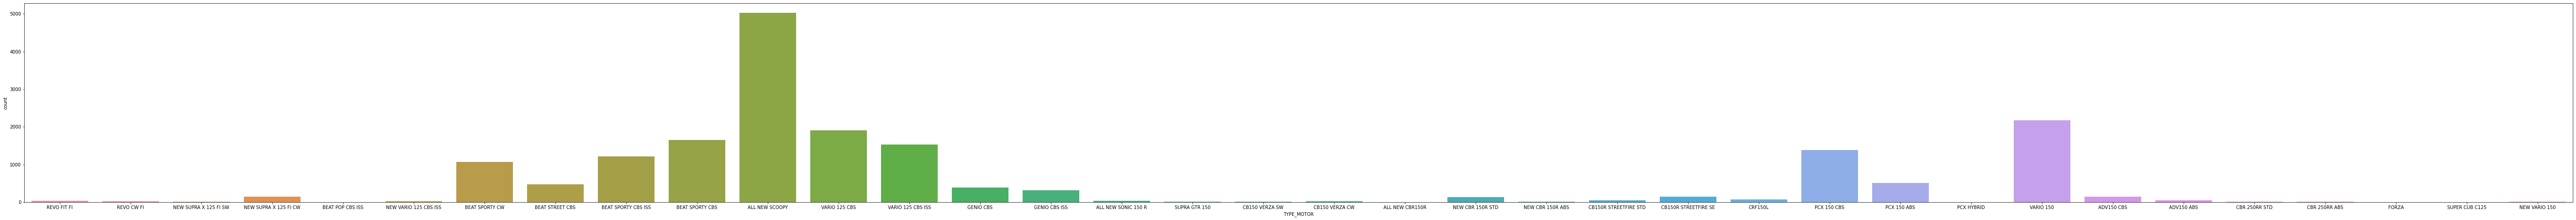

In [34]:
# Visualisasikan kolom motor
dims = (100, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=df.TYPE_MOTOR)

In [35]:
df.isna().sum()

SALES DATE                    0
TYPE_MOTOR                    0
COLOR                         0
KODE CUSTOMER                 0
JENIS KELAMIN                 0
TANGGAL LAHIR                 0
KECAMATAN SURAT               0
KOTA SURAT                    0
PROPINSI                      0
STATUS RUMAH                  0
JENIS PENJUALAN STNK          0
JENIS PENJUALAN SSU           0
BESAR DP                   7688
BESAR CICILAN              7688
LAMA CICILAN               7688
AGAMA                         0
PEKERJAAN                     0
PENGELUARAN                   0
PENDIDIKAN                    0
KEBERSEDIAAN DIHUBUNGI        0
MERK MOTOR SBLMNYA            0
TYPE MOTOR SBLMNYA            0
SMH DIGUNAKAN UNTUK           0
YG MENGGUNAKAN SMH            0
HOBI                          0
KETERANGAN                11354
KEWARGANEGARAAN               6
dtype: int64

In [36]:
df.shape

(18616, 27)

In [37]:
x = df['TYPE_MOTOR']
df = df.drop(columns=['TYPE_MOTOR','TANGGAL LAHIR','LAMA CICILAN','BESAR DP','BESAR CICILAN','SALES DATE','KETERANGAN','KEWARGANEGARAAN'])

In [38]:
x.head()

0    REVO FIT FI
1    REVO FIT FI
2    REVO FIT FI
3    REVO FIT FI
4    REVO FIT FI
Name: TYPE_MOTOR, dtype: object

In [39]:
df.head()

,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI
0,HITAM,INDIVIDUAL,LAKI-LAKI,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)
1,HITAM,INDIVIDUAL,LAKI-LAKI,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)
2,HITAM,INDIVIDUAL,LAKI-LAKI,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)
3,HITAM,INDIVIDUAL,LAKI-LAKI,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan
4,HITAM,INDIVIDUAL,LAKI-LAKI,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)


In [40]:
#Mengencode Data Kategorikal

list_1=list(df.columns)

In [41]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [44]:
df

,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI
0,5,0,0,13,0,0,1,0,0,2,0,4,0,1,1,0,1,3,0
1,5,0,0,5,0,0,1,0,0,2,9,5,4,1,1,3,1,3,0
2,5,0,0,4,0,0,0,0,0,2,4,2,4,1,1,3,1,3,0
3,5,0,0,14,0,0,1,1,1,2,9,2,4,1,1,0,5,3,20
4,5,0,0,15,0,0,1,0,0,2,4,2,4,1,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,5,0,1,21,0,0,1,0,0,2,10,4,4,1,0,1,1,3,34
18612,5,0,0,9,0,0,2,1,0,2,9,2,4,1,5,0,4,2,25
18613,11,0,0,2,0,0,0,0,0,2,9,6,4,1,1,2,1,3,0
18614,2,0,0,10,0,0,0,1,0,2,9,4,0,1,1,0,1,3,20


In [ ]:
df['COLOR'].value_counts()

5     5327
12    2932
11    2326
15    1691
4     1256
13     773
3      669
19     605
0      571
16     549
2      405
10     382
7      318
1      306
18     246
8      173
17      43
6       34
21       4
14       3
20       2
9        1
Name: COLOR, dtype: int64

In [ ]:
df['PEKERJAAN'].value_counts()

9     5819
4     3399
2     2655
10    1057
23     987
18     862
15     756
16     563
21     491
11     430
1      337
7      307
19     246
14     228
17     149
13     100
20      71
12      68
22      30
0       29
6       14
3       11
8        6
5        1
Name: PEKERJAAN, dtype: int64

In [ ]:
df['HOBI'].value_counts()

0     4074
20    2908
24    2887
23    2518
25    1224
48     486
11     457
22     425
18     404
14     397
26     356
21     336
27     259
44     191
4      180
28     164
33     129
2      113
42      97
50      90
53      78
40      77
37      73
5       62
35      62
47      50
36      46
7       45
30      42
29      41
54      29
31      29
16      29
46      29
3       29
13      27
6       27
41      21
34      17
32      15
8       11
15      11
55      10
51       9
38       9
39       8
43       7
10       5
49       4
17       4
19       3
9        3
1        3
52       2
12       2
45       2
Name: HOBI, dtype: int64

In [45]:
y=x
x=df

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


**KNN**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [48]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.14      0.09      0.11        11
           ADV150 CBS       0.05      0.10      0.07        21
       ALL NEW SCOOPY       0.44      0.69      0.54       993
  ALL NEW SONIC 150 R       0.67      0.44      0.53         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.34      0.36      0.35       312
  BEAT SPORTY CBS ISS       0.40      0.28      0.33       261
       BEAT SPORTY CW       0.28      0.24      0.26       231
      BEAT STREET CBS       0.26      0.22      0.24        92
       CB150 VERZA CW       0.00      0.00      0.00         3
       CB150 VERZA SW       0.00      0.00      0.00         0
 CB150R STREETFIRE SE       0.08      0.04      0.06        23
CB150R STREETFIRE STD       0.00      0.00      0.00         8
        CBR 250RR ABS       0.00      0.00      0.00         1
        CBR 250RR STD      

**SVC**

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.00      0.00      0.00        11
           ADV150 CBS       0.00      0.00      0.00        21
       ALL NEW SCOOPY       0.29      0.99      0.45       993
  ALL NEW SONIC 150 R       0.00      0.00      0.00         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.00      0.00      0.00       312
  BEAT SPORTY CBS ISS       0.00      0.00      0.00       261
       BEAT SPORTY CW       0.00      0.00      0.00       231
      BEAT STREET CBS       0.00      0.00      0.00        92
       CB150 VERZA CW       0.00      0.00      0.00         3
 CB150R STREETFIRE SE       0.00      0.00      0.00        23
CB150R STREETFIRE STD       0.00      0.00      0.00         8
        CBR 250RR ABS       0.00      0.00      0.00         1
              CRF150L       0.00      0.00      0.00        15
            GENIO CBS      

**NAIVE BAYES**

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.03      0.18      0.05        11
           ADV150 CBS       0.00      0.00      0.00        21
      ALL NEW CBR150R       0.00      0.00      0.00         0
       ALL NEW SCOOPY       0.40      0.00      0.01       993
  ALL NEW SONIC 150 R       0.00      0.00      0.00         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.00      0.00      0.00       312
  BEAT SPORTY CBS ISS       0.00      0.00      0.00       261
       BEAT SPORTY CW       0.00      0.00      0.00       231
      BEAT STREET CBS       0.00      0.00      0.00        92
       CB150 VERZA CW       0.00      0.00      0.00         3
       CB150 VERZA SW       0.00      0.00      0.00         0
 CB150R STREETFIRE SE       0.00      0.00      0.00        23
CB150R STREETFIRE STD       0.04      0.50      0.07         8
        CBR 250RR ABS      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DECISION TREE**

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [57]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.00      0.00      0.00        11
           ADV150 CBS       0.00      0.00      0.00        21
       ALL NEW SCOOPY       0.86      0.89      0.87       993
  ALL NEW SONIC 150 R       1.00      0.11      0.20         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.91      0.71      0.79       312
  BEAT SPORTY CBS ISS       1.00      0.58      0.74       261
       BEAT SPORTY CW       0.36      0.10      0.16       231
      BEAT STREET CBS       0.36      0.26      0.30        92
       CB150 VERZA CW       0.00      0.00      0.00         3
 CB150R STREETFIRE SE       0.00      0.00      0.00        23
CB150R STREETFIRE STD       0.00      0.00      0.00         8
        CBR 250RR ABS       0.00      0.00      0.00         1
              CRF150L       0.00      0.00      0.00        15
            GENIO CBS      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       1.00      0.64      0.78        11
           ADV150 CBS       0.48      0.57      0.52        21
       ALL NEW SCOOPY       0.82      0.92      0.86       993
  ALL NEW SONIC 150 R       1.00      0.78      0.88         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.78      0.82      0.80       312
  BEAT SPORTY CBS ISS       0.89      0.75      0.82       261
       BEAT SPORTY CW       0.65      0.58      0.62       231
      BEAT STREET CBS       0.67      0.51      0.58        92
       CB150 VERZA CW       0.60      1.00      0.75         3
 CB150R STREETFIRE SE       0.69      0.48      0.56        23
CB150R STREETFIRE STD       0.50      0.38      0.43         8
        CBR 250RR ABS       1.00      1.00      1.00         1
        CBR 250RR STD       0.00      0.00      0.00         0
              CRF150L      

**ADBoosting Classifier**

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [61]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.00      0.00      0.00        11
           ADV150 CBS       0.00      0.00      0.00        21
       ALL NEW SCOOPY       0.29      1.00      0.44       993
  ALL NEW SONIC 150 R       0.00      0.00      0.00         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.00      0.00      0.00       312
  BEAT SPORTY CBS ISS       0.00      0.00      0.00       261
       BEAT SPORTY CW       0.00      0.00      0.00       231
      BEAT STREET CBS       0.00      0.00      0.00        92
       CB150 VERZA CW       0.00      0.00      0.00         3
 CB150R STREETFIRE SE       0.00      0.00      0.00        23
CB150R STREETFIRE STD       0.00      0.00      0.00         8
        CBR 250RR ABS       0.00      0.00      0.00         1
              CRF150L       0.00      0.00      0.00        15
            GENIO CBS      

**Gradient Boosting Classifier**

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.00      0.00      0.00        11
           ADV150 CBS       1.00      0.14      0.25        21
       ALL NEW SCOOPY       0.82      0.90      0.86       993
  ALL NEW SONIC 150 R       0.75      0.67      0.71         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.80      0.73      0.77       312
  BEAT SPORTY CBS ISS       1.00      0.57      0.73       261
       BEAT SPORTY CW       0.31      0.32      0.31       231
      BEAT STREET CBS       0.47      0.23      0.31        92
       CB150 VERZA CW       0.00      0.00      0.00         3
 CB150R STREETFIRE SE       0.40      0.09      0.14        23
CB150R STREETFIRE STD       0.25      0.38      0.30         8
        CBR 250RR ABS       0.25      1.00      0.40         1
        CBR 250RR STD       0.00      0.00      0.00         0
              CRF150L      

In [64]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
14436,ALL NEW SCOOPY,ALL NEW SCOOPY
13414,BEAT STREET CBS,BEAT STREET CBS
5010,PCX 150 CBS,VARIO 125 CBS ISS
4402,VARIO 125 CBS ISS,VARIO 125 CBS ISS
17386,PCX 150 CBS,VARIO 125 CBS
...,...,...
11496,PCX 150 CBS,VARIO 125 CBS
6647,BEAT SPORTY CW,BEAT SPORTY CW
4676,GENIO CBS ISS,NEW SUPRA X 125 FI CW
7678,BEAT SPORTY CBS,BEAT SPORTY CBS


**8. XGB Classifier**

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [65]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.00      0.00      0.00        11
           ADV150 CBS       0.00      0.00      0.00        21
       ALL NEW SCOOPY       0.44      0.99      0.61       993
  ALL NEW SONIC 150 R       0.00      0.00      0.00         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.91      0.71      0.79       312
  BEAT SPORTY CBS ISS       1.00      0.58      0.74       261
       BEAT SPORTY CW       0.36      0.02      0.04       231
      BEAT STREET CBS       0.64      0.20      0.30        92
       CB150 VERZA CW       0.00      0.00      0.00         3
 CB150R STREETFIRE SE       0.00      0.00      0.00        23
CB150R STREETFIRE STD       0.00      0.00      0.00         8
        CBR 250RR ABS       0.00      0.00      0.00         1
              CRF150L       0.00      0.00      0.00        15
            GENIO CBS      

 **9. Extra Trees Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [68]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
                        precision    recall  f1-score   support

           ADV150 ABS       0.80      0.73      0.76        11
           ADV150 CBS       0.48      0.62      0.54        21
       ALL NEW SCOOPY       0.81      0.90      0.85       993
  ALL NEW SONIC 150 R       0.64      0.78      0.70         9
     BEAT POP CBS ISS       0.00      0.00      0.00         1
      BEAT SPORTY CBS       0.82      0.82      0.82       312
  BEAT SPORTY CBS ISS       0.88      0.77      0.82       261
       BEAT SPORTY CW       0.65      0.62      0.64       231
      BEAT STREET CBS       0.68      0.54      0.61        92
       CB150 VERZA CW       0.50      1.00      0.67         3
 CB150R STREETFIRE SE       0.63      0.52      0.57        23
CB150R STREETFIRE STD       0.50      0.38      0.43         8
        CBR 250RR ABS       1.00      1.00      1.00         1
        CBR 250RR STD       0.00      0.00      0.00         0
              CRF150L      

**10. Bagging Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7505370569280344

In [70]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
14436,ALL NEW SCOOPY,ALL NEW SCOOPY
13414,BEAT STREET CBS,VARIO 150
5010,PCX 150 CBS,PCX 150 CBS
4402,VARIO 125 CBS ISS,VARIO 125 CBS ISS
17386,PCX 150 CBS,PCX 150 CBS
...,...,...
11496,PCX 150 CBS,PCX 150 CBS
6647,BEAT SPORTY CW,VARIO 125 CBS ISS
4676,GENIO CBS ISS,NEW SUPRA X 125 FI CW
7678,BEAT SPORTY CBS,BEAT SPORTY CBS


# RANDOM FOREST CLASSIFIER

In [71]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [72]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7502685284640171
